In [7]:
#import scikitlearn as sklearn
from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors, Draw
from rdkit.Chem.Draw import IPythonConsole
#from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import os.path


import math
import random
import collections

x_train_filename='1K_SMILES_strings.txt'
t_train_filename='1K_SMILES_strings_charges.txt'

data_dir = os.path.join(os.path.curdir, 'data')

x_train_data=os.path.join(data_dir, x_train_filename)
t_train_data=os.path.join(data_dir, t_train_filename)

# altering to use a % of the input data for test
fraction_of_test_molecules=0.1
validation_split=0.1
class_to_charge_list=[0,1,-1,-2]

"""TRAINING DATA PREPROCESSING"""
#Convert training data, in the form of txt files of line-by-line SMILES strings and charges into arrays
with open(x_train_data) as my_file:
    SMILES_array = my_file.readlines()

with open(t_train_data) as my_file:
    charges_array = my_file.readlines()

no_of_data_points=int(len(charges_array))
#no_of_test_points=int(fraction_of_test_molecules*no_of_data_points)
#print('{} datapoints, {} randomly selected for test, leaving {} for train'.format(no_of_data_points, no_of_test_points, no_of_data_points-no_of_test_points))


#test_line_nos=random.sample(range(0, no_of_data_points), no_of_test_points)
#train_line_nos=[x for x in range(0, no_of_data_points) if x not in test_line_nos]

#no_of_train_points=int(len(train_line_nos))
#print('Validation split is {}, so {} points val, {} points pure train'.format(validation_split, int(validation_split*no_of_train_points), int(no_of_train_points-(validation_split*no_of_train_points))))
# make new arrays
#X_train = []
#T_train = []
#for i in train_line_nos:
#    X_train.append(SMILES_array[i])
#    T_train.append(charges_array[i])


#X_test = []
#T_test = []
#for i in test_line_nos:
#    X_test.append(SMILES_array[i])
#    T_test.append(charges_array[i])

#print('Randomly assigned test set set up: stats follows:')
#print('Train: {}'.format(collections.Counter(T_train)))
#print('Test: {}'.format(collections.Counter(T_test)))


#Convert testing data, in the form of txt file of line-by-line SMILES strings into arrays
#with open('10_SMILES_strings_test.txt') as my_file:
#    test_SMILES_array = my_file.readlines()

#Convert each item of the training array of SMILES strings into molecules
#mols = [Chem.rdmolfiles.MolFromSmiles(SMILES_string) for SMILES_string in X_train]

mols=[]
for SMILES_string in SMILES_array:
    mols.append(Chem.rdmolfiles.MolFromSmiles(SMILES_string))

#Convert training molecules into training fingerprints
bi = {}
fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m, radius=2, bitInfo= bi, nBits=256) for m in mols]




In [17]:
m=Chem.rdmolfiles.MolFromSmiles('CCC(CC)OC1C=C(CC(C1NC(=O)C)N)C(=O)OCC')

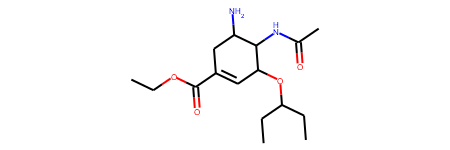

In [18]:
m

Stuff to try and debug the 1M SMILES string stuff 

In [8]:
no_of_data_points
len(mols)

1000

In [9]:
mols=[]
for SMILES_string in SMILES_array:
    print(SMILES_string)
    mols.append(Chem.rdmolfiles.MolFromSmiles(SMILES_string))

CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2

CCC(=O)O[C@]1(CC[NH+](C[C@@H]1CC=C)C)c2ccccc2

C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]

C[C@H](Cc1ccccc1)[NH2+][C@@H](C#N)c2ccccc2

C[C@@H](CC(c1ccccc1)(c2ccccc2)C(=O)N)[NH+](C)C

Cc1c(c(=O)n(n1C)c2ccccc2)NC(=O)[C@H](C)[NH+](C)C

c1ccc(cc1)[C@@H](C(=O)[O-])O

CC[C@](C)(C[NH+](C)C)OC(=O)c1ccccc1

COc1cc(c(c2c1OCO2)OC)CC=C

Cc1ccccc1NC(=O)[C@H](C)[NH+]2CCCC2

CC(=O)Oc1ccccc1C(=O)[O-]

C[NH+]1[C@@H]2CC[C@H]1CC(C2)OC(=O)[C@H](CO)c3ccccc3

c1cc(ccc1[C@@H](CC(=O)[O-])C[NH3+])Cl

c1cc(ccc1C(=O)[O-])N[C@@H]2[C@@H]([C@H]([C@@H](CO2)O)O)O

C[C@@H](c1ccc2c(c1)nc(o2)c3ccc(cc3)Cl)C(=O)[O-]

CCc1c(c2ccccc2o1)C(=O)c3ccc(cc3)O

c1ccc(cc1)C(=O)O[C@@H]2C[NH+]3CCC2CC3

c1ccc(cc1)[C@@H](C(=O)c2ccccc2)O

c1ccc(cc1)COC(=O)[C@H](c2ccccc2)O

C[C@H](Cc1cc(c(cc1OC)Br)OC)[NH3+]

C[NH+](C)CCO[C@H](c1ccccc1)c2ccc(cc2)Br

C[NH+](C)CC[C@@H](c1ccc(cc1)Br)c2ccccn2

CCOc1ccc(cc1)NC(=O)C[C@@H](C)O

CCc1cccc2c1oc(c2)[C@@H](C[NH2+]C(C)(C)C)O

C[NH+]1CCc2cc3c(c-4c2[C@@H]1Cc5c4c(


c1ccc(cc1)CCn2c3c(cn2)c4nc(nn4c(n3)N)c5ccco5

Cc1cn(c(=O)[nH]c1=O)[C@H]2[C@H]([C@@H]([C@H](O2)CO)O)F

Cc1c(c(=O)cco1)OC(=O)c2ccccc2OC(=O)C

c1ccc2c(c1)-c3c4c(ccnc4C2=O)cc5c3OCO5

Cc1c(nc([nH]c1=O)N2CCCC2)C

c1ccc2c(c1)C(=O)N(CO2)CCO

c1ccc2c(c1)nc(s2)c3ccc(cc3)N

CCN(c1cccc(c1)c2ccnc3n2ncc3C#N)C(=O)C

CCn1nc(nn1)C2=CCC[NH+](C2)C

c1cc(ccc1N)S(=O)(=O)c2ccc(cc2)N

c1cc2c(cc1C(=O)N3CCCCC3)OCO2

C[C@@H]1Cc2cc(ccc2O1)C(=O)CCc3ccccc3

c1cc(ccc1C#N)[C@@H]2CCCc3n2cnc3

c1ccc(cc1)c2cn3ccnc3c(=O)[nH]2

CC(=O)N[C@H]1CCc2c1cccc2

CN1c2ccc(cc2C(=NCC1=O)c3ccccc3)Cl

Cc1cc2c(nc1)CC[C@@H](C2)Cc3ccc(cc3)OC

c1cc2cnccc2c(c1)S(=O)(=O)N3CCC[NH2+]CC3

c1cc2c(cc1C(=O)N3CCCCC3)nccn2

COc1c2c(nc(n1)N)n(cn2)[C@@H]3[C@@H]([C@H]([C@@H](O3)CO)O)O

c1cc2c(c(c1)Cl)CN(C2)C3=[NH+]CCN3

c1cn(c(=O)nc1N)[C@@H]2C([C@H]([C@@H](O2)CO)O)(F)F

CC(=O)Nc1ccccc1c2nc3ccccc3s2

CCC[NH+]1CCCC[C@@H]1C(=O)Nc2c(cccc2C)C

Cc1ccc(cc1)c2csc(n2)C

Cc1nc(c(o1)c2ccc(c(c2)F)S(=O)(=O)N)C3CCCCC3

CCc1ccc2c(c1)c(cs2)CCNC(=O)C

Cn1c2ccccc2c3c1

In [10]:
mols[46903]

IndexError: list index out of range

In [11]:
Chem.rdmolfiles.MolFromSmiles('COc1ccc(cc1)COC(=O)N=N=N')

In [12]:
SMILES_array[46903]

IndexError: list index out of range

In [13]:
erroneous = []
erroneous.append(SMILES_array[46903])
erroneous.append(SMILES_array[107974])
erroneous.append(SMILES_array[692685])
erroneous.append(SMILES_array[692686])

IndexError: list index out of range

In [14]:
erroneous

[]

In [15]:
bi = {}
fps=[]
for m_index in range(0,len(mols)):
    print(m_index)
    fps.append(rdMolDescriptors.GetMorganFingerprintAsBitVect(mols[m_index], radius=2, bitInfo= bi, nBits=256))
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27


"""NEURAL NETWORK"""
#The neural network model
model = Sequential([
    Dense(256, input_shape=(256,), activation= "relu"),
    Dense(128, activation= "sigmoid"),
    Dense(64, activation= "sigmoid"),
    Dense(34, activation= "sigmoid"),
    Dense(16, activation= "sigmoid"),
    BatchNormalization(axis=1),
    Dense(4, activation= "softmax")
])
model.summary()

#Compiling the model
model.compile(optimizer=Adam(lr=0.00001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Training the model
model.fit(np.array(np_fps_array), np.array(T_train), validation_split=validation_split, batch_size=10, epochs= 100, shuffle=True, verbose=1)

#Predictions with test dataset
predictions = model.predict(np.array(test_np_fps_array), batch_size=1, verbose=1)
no_correct = 0

print('class\t0\t1\t\t2\t\t3')
print('charge\t0\t+1\t\t-1\t\t-2')

for index in range(len(predictions)):
    prediction=predictions[index]
    print (prediction)
    predicted_class=np.argmax(prediction)    
    ground_truth_class=int(T_test[index][0])
    print('Predicted class {}, ground truth class {}'.format(predicted_class, ground_truth_class))
    print('Predicted charge {}, ground truth charge {}'.format(
        class_to_charge_list[predicted_class], 
        class_to_charge_list[ground_truth_class]))
    if predicted_class == ground_truth_class:
        no_correct = no_correct+1
        print('Correct')
    else:
        print('Incorrect')

print('{} correct, {}%'.format(no_correct, 100*(no_correct/no_of_test_points)))

#Convert training fingerprints into binary, and put all training binaries into arrays
np_fps_array = []
for fp in fps:
  arr = np.zeros((1,), dtype= int)
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_fps_array.append(arr)

"""TESTING DATA PREPROCESSING"""
#Convert each item of the testing array of SMILES strings into molecules
test_mols = [Chem.rdmolfiles.MolFromSmiles(test_SMILES_string) for test_SMILES_string in X_test]

#Convert testing molecules into testing fingerprints
test_fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(test_m, radius=2, nBits=256) for test_m in test_mols]

#Convert testing fingerprints into binary, and put all testing binaries into arrays
test_np_fps_array = []
for test_fp in test_fps:
  test_arr = np.zeros((1,), dtype= int)
  DataStructs.ConvertToNumpyArray(test_fp, test_arr)
  test_np_fps_array.append(test_arr)

